In [1]:
import sys
sys.path.insert(0, '..\\..\\..\\frxas.py')

from frxas import visualization

import numpy as np
import matplotlib.pyplot as plt
import palettable
from impedance.models.circuits import CustomCircuit

In [2]:
def plot_nyquist(ax, Z, scale=1, units='Ohms', fmt='.-', **kwargs):
    """ Plots impedance as a Nyquist plot using matplotlib

        Parameters
        ----------
        ax: matplotlib.axes.Axes
            axes on which to plot the nyquist plot
        Z: np.array of complex numbers
            impedance data
        scale: float
            the scale for the axes
        units: string
            units for :math:`Z(\\omega)`
        fmt: string
            format string passed to matplotlib (e.g. '.-' or 'o')

        Other Parameters
        ----------------
        **kwargs : `matplotlib.pyplot.Line2D` properties, optional
            Used to specify line properties like linewidth, line color,
            marker color, and line labels.

        Returns
        -------
        ax: matplotlib.axes.Axes
    """

    ax.plot(np.real(Z), -np.imag(Z), fmt, **kwargs)

    # Make the axes square
    ax.set_aspect('equal')

    # Set the labels to -imaginary vs real
    ax.set_xlabel(r'$Z^{\prime}(\sigma)$ ' +
                  '$(\Omega)$'.format(units), fontsize=20)
    ax.set_ylabel(r'$-Z^{\prime\prime}(\sigma)$ ' +
                  '$(\Omega)$'.format(units), fontsize=20)

    # Make the tick labels larger
    ax.tick_params(axis='both', which='major', labelsize=14)

    # Change the number of labels on each axis to five
    ax.locator_params(axis='x', nbins=5, tight=True)
    ax.locator_params(axis='y', nbins=5, tight=True)

    # Add a light grid
    ax.grid(b=True, which='major', axis='both', alpha=.5)

    # Change axis units to 10**log10(scale) and resize the offset text
    limits = -np.log10(scale)
    if limits != 0:
        ax.ticklabel_format(style='sci', axis='both',
                            scilimits=(limits, limits))
    y_offset = ax.yaxis.get_offset_text()
    y_offset.set_size(18)
    t = ax.xaxis.get_offset_text()
    t.set_size(18)

    return ax

In [3]:
sigs = [0, 0.1, 0.3, 1, 3., 10, 30, 100]

colors = palettable.colorbrewer.sequential.GnBu_8.mpl_colors
markers = ['P','o','d','v','^','s','>','<']

for i, (color, sig) in enumerate(zip(colors, sigs)):
    sub = ((i-7)/30, (i-7)/15, (i-7)/9)
    print(color, tuple(map(lambda i, j: i +j, color, sub)))
    colors[i] = tuple(map(lambda i, j: i +j, color, sub))

(0.9686274509803922, 0.9882352941176471, 0.9411764705882353) (0.7352941176470589, 0.5215686274509804, 0.1633986928104575)
(0.8784313725490196, 0.9529411764705882, 0.8588235294117647) (0.6784313725490196, 0.5529411764705882, 0.19215686274509802)
(0.8, 0.9215686274509803, 0.7725490196078432) (0.6333333333333334, 0.588235294117647, 0.2169934640522876)
(0.6588235294117647, 0.8666666666666667, 0.7098039215686275) (0.5254901960784314, 0.6000000000000001, 0.26535947712418306)
(0.4823529411764706, 0.8, 0.7686274509803922) (0.38235294117647056, 0.6000000000000001, 0.4352941176470589)
(0.3058823529411765, 0.7019607843137254, 0.8274509803921568) (0.23921568627450984, 0.5686274509803921, 0.6052287581699346)
(0.16862745098039217, 0.5490196078431373, 0.7450980392156863) (0.13529411764705884, 0.48235294117647065, 0.6339869281045751)
(0.03137254901960784, 0.34509803921568627, 0.6196078431372549) (0.03137254901960784, 0.34509803921568627, 0.6196078431372549)


(0, 1.05)

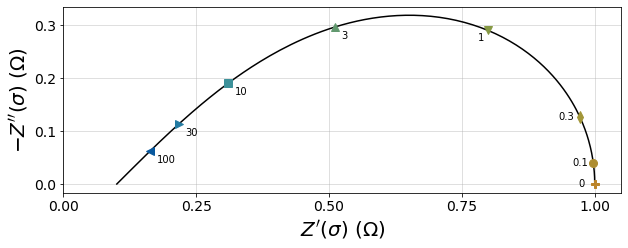

In [4]:
R_ohm = .1
R_chem = .9
tg = 1/(2 * np.pi)
w = 2 * np.pi * np.logspace(-2, 6, num=321)
w[0] = 0
sigs = [0, 0.1, 0.3, 1, 3., 10, 30, 100]
inds = []
Z = R_ohm + R_chem / (np.sqrt(1 + 1j * w * tg))

_, ax = plt.subplots(figsize=(10,10))

plot_nyquist(ax, Z,fmt='-', c=(0,0,0))
xs = [-0.03, -0.04, -0.04, -.02, .012, .012, .012, .012]
ys =  [-0.005, -0.005, -0.005, -.02, -.022, -.022, -.022, -.022]

for i, sig in enumerate(sigs):
    ind = np.isclose(w*tg, sig,atol=1e-2,rtol=1e-2).nonzero()[0][0]
    inds.append(ind)
    plot_nyquist(ax, Z[ind], color=colors[i], marker=markers[i], markersize=8, units=r'$\Omega$')
    if int(sig):
        ax.annotate(f'{sig:.0f}', xy=(Z[ind].real,-Z[ind].imag),
                    xytext=(Z[ind].real+xs[i],-Z[ind].imag+ys[i]),
                    annotation_clip=False)#, xytext=(Z[ind].real,Z[ind].imag), textcoords='offset points')
    elif sig==0:
        ax.annotate(f'{sig:.0f}', xy=(Z[ind].real,-Z[ind].imag),
                    xytext=(Z[ind].real+xs[i],-Z[ind].imag+ys[i]),
                    annotation_clip=False)
    else:
        ax.annotate(f'{sig:.1f}', xy=(Z[ind].real,-Z[ind].imag), 
                    xytext=(Z[ind].real+xs[i],-Z[ind].imag+ys[i]))#, xytext=(Z[ind].real,Z[ind].imag), textcoords='offset points')

ax.set_xlim(0,1.05)
# plt.savefig('Plots\\Patterned_Z.png', bbox_inches='tight', dpi=400)

In [42]:
def chi(y, Q, ld, tg, gamma, L, w_til):
    return -Q * np.exp(-y/ld*np.sqrt(1 + 1j * w_til * tg)) / (1 + gamma * L / ld * np.sqrt(1 + 1j * w_til *tg))

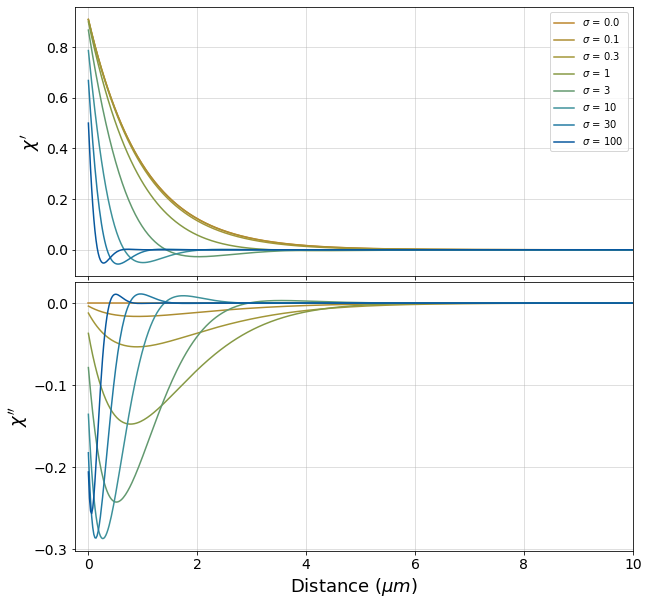

In [43]:
L = 0.65
Q = -1
ld = 2
gamma = R_ohm * ld / L
# w_til = w[10]
y = np.linspace(0, 20, num=500)
# chi_sim = chi(y, Q, ld, tg, gamma, L, w_til)

fig, ax2 = plt.subplots(nrows=2, figsize=(10,10))
fig.subplots_adjust(hspace=0.02)
for i, sig in enumerate(sigs):
    if int(sig):
        visualization.plot_chi(ax2, y/ld, chi(y, Q, ld, tg, gamma, L, w[inds[i]]), marker=None,
                 color=colors[i], label=f'$\sigma$ = {w[inds[i]]*tg:.0f}')
    else:
        visualization.plot_chi(ax2, y/ld, chi(y, Q, ld, tg, gamma, L, w[inds[i]]), marker=None,
                 color=colors[i], label=f'$\sigma$ = {w[inds[i]]*tg:.1f}')
ax2[0].set_xlim(-.25,10)
ax2[1].set_xlim(-.25,10)
ax2[0].legend()
# plt.show()
plt.savefig('Plots/Predicted_Chi.png', bbox_inches='tight', dpi=400)